In [11]:
%matplotlib notebook
from sympy import *
from sympy import besselk, besselj
from sympy.utilities.lambdify import lambdify
from sympy.utilities.autowrap import ufuncify
from sympy.utilities.lambdify import implemented_function
from sympy.physics.hydrogen import R_nl
import numpy as np
from scipy.special import kn, jv, kv, iv, yv, k0, k1
from scipy.integrate import quad
import matplotlib.pyplot as plt
from scipy import misc
init_printing(use_unicode=True)

In [2]:
x, y, r, R, E, K, phi, theta_s, a, R_L, R_R, d, p, v, theta_1, theta_2 = symbols('x y r R E K phi theta_s a R_L R_R d p v theta_1 theta_2')

##Single Cylinder

In [22]:
def Nx(x,y,theta_s):
    return -theta_s*(y/(x**2+y**2))

def Ny(x,y,theta_s):
    return theta_s*(x/(x**2+y**2))

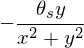

In [23]:
Nx(x,y,theta_s)

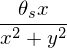

In [24]:
Ny(x,y,theta_s)

In [25]:
DXNX = Nx(x,y,theta_s).diff(x)
DYNX = Nx(x,y,theta_s).diff(y)
DXNY = Ny(x,y,theta_s).diff(x)
DYNY = Ny(x,y,theta_s).diff(y)

In [26]:
def single_f(x, y, theta_s, dxnx, dynx, dxny, dyny):
    return (dxnx**2 + dynx**2 + dxny**2 + dyny**2 + 2*dxnx*dyny - 2*dxny*dynx)/2

In [27]:
simplify(single_f(x, y, theta_s, DXNX, DYNX, DXNY, DYNY))

##Single Cylinder E-Field

In [3]:
def nx(r, phi, theta_s, R, d):
    return (-theta_s*sin(phi)*besselk(1, r/d)/besselk(1, R/d))

def ny(r, phi, theta_s, R, d):
    return (theta_s*cos(phi)*besselk(1, r/d)/besselk(1, R/d))

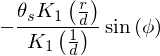

In [4]:
nx(r, phi, theta_s, 1, d)

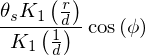

In [5]:
ny(r, phi, theta_s, 1, d)

In [4]:
dxnx = cos(phi)*nx(r, phi, theta_s, 1, d).diff(r) - (sin(phi)*nx(r, phi, theta_s, 1, d).diff(phi))/r
dynx = sin(phi)*nx(r, phi, theta_s, 1, d).diff(r) + (cos(phi)*nx(r, phi, theta_s, 1, d).diff(phi))/r
dxny = cos(phi)*ny(r, phi, theta_s, 1, d).diff(r) - (sin(phi)*ny(r, phi, theta_s, 1, d).diff(phi))/r
dyny = sin(phi)*ny(r, phi, theta_s, 1, d).diff(r) + (cos(phi)*ny(r, phi, theta_s, 1, d).diff(phi))/r

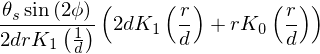

In [7]:
simplify(dxnx)

In [8]:
(dxnx+dyny)**2

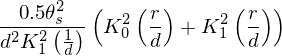

In [5]:
simplify((1/2)*(simplify((dxny-dynx)**2) + simplify((nx(r, phi, theta_s, 1, d)**2+ny(r, phi, theta_s, 1, d)**2)/d**2)))

In [6]:
def f(r, phi, theta_s, R, d, dxnx, dynx, dxny, dyny):
    return (1/2)*((dxnx+dyny)**2 + (dxny-dynx)**2) + (nx(r, phi, theta_s, 1, d)**2 + ny(r, phi, theta_s, 1, d)**2)/(d**2*2)

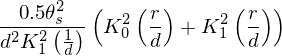

In [7]:
simplify(f(r, phi, theta_s, 1, d, dxnx, dynx, dxny, dyny))

In [66]:
def Efield_f(r, theta_s, d):
    return (theta_s**2*(k0(r/d)**2 + k1(r/d)**2))/(2*(d*k1(1/d))**2)

###$d = 2$, $\theta_s = 0.2$

In [67]:
I, e = quad(Efield_f, 1, np.inf, args=(0.2, 2))

In [68]:
I

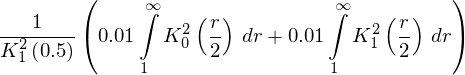

In [34]:
integrate((0.2/(2*besselk(1,1/2)))**2*(besselk(0,r/2)**2+besselk(1,r/2)**2), (r,1,oo))

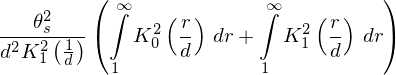

In [35]:
integrate((theta_s/(d*besselk(1,1/d)))**2*(besselk(0,r/d)**2+besselk(1,r/d)**2), (r,1,oo))

##Two Cylinders E-Field

In [3]:
def nx_cart(r, x, y, theta_s, R, d):
    return (-theta_s*y*besselk(1, r/d))/(r*besselk(1, R/d))

def ny_cart(r, x, y, theta_s, R, d):
    return (theta_s*x*besselk(1, r/d))/(r*besselk(1, R/d))

In [ ]:
a = 2
d = 1
R_L = 1
R_R = 1
theta_s = 0.2

In [4]:
nx_L = nx_cart(sqrt((x+a)**2 + y**2), x, y, theta_2, 1, d)
ny_L = ny_cart(sqrt((x+a)**2 + y**2), x+a, y, theta_2, 1, d)
nx_R = nx_cart(sqrt((x-a)**2 + y**2), x, y, theta_1, 1, d)
ny_R = ny_cart(sqrt((x-a)**2 + y**2), x-a, y, theta_1, 1, d)

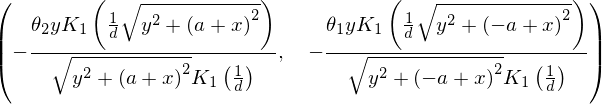

In [5]:
nx_L, nx_R

In [ ]:
#ny_L, ny_R

In [20]:
nx_tot = nx_L + nx_R
ny_tot = ny_L + ny_R

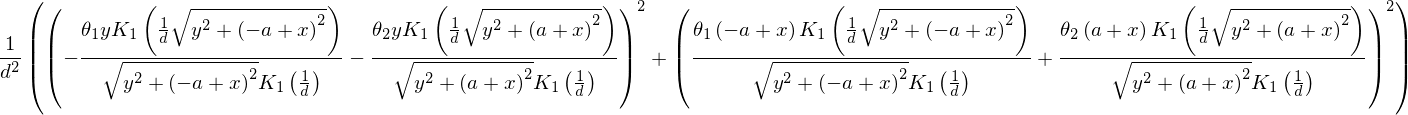

In [31]:
(nx_tot**2 + ny_tot**2)/d**2

In [21]:
dxnx_2cyl = nx_tot.diff(x)
dynx_2cyl = nx_tot.diff(y)
dxny_2cyl = ny_tot.diff(x)
dyny_2cyl = ny_tot.diff(y)

##First term

In [22]:
simplify((dxnx_2cyl + dyny_2cyl)**2)

##Second term

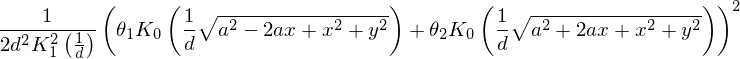

In [36]:
simplify((dxny_2cyl - dynx_2cyl)**2/2)

##n term

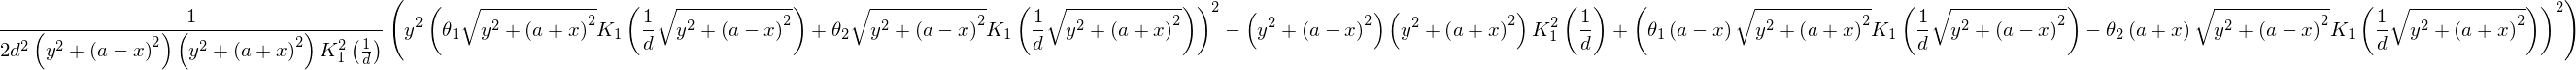

In [39]:
simplify((nx_tot**2 + ny_tot**2 - 1)/(2*d**2))

In [ ]:
def f_2(n1, n2, theta_s, a, R_L, R_R, d, dxnx, dynx, dxny, dyny):
    return (1/2)*(dxnx**2 + dynx**2 + dxny**2 + dyny**2 + 2*dxnx*dyny - 2*dxny*dynx) + (1/2)*(n1**2 + n2**2) - (1/2)

In [ ]:
f_2cyl = f_2(nx_tot, ny_tot, theta_s, a, R_L, R_R, d, dxnx_2cyl, dynx_2cyl, dxny_2cyl, dyny_2cyl)

In [ ]:
I, e = quad(simple_f, 1, 200, args=(0.2, 10, 1, 500))

In [ ]:
I